In [6]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_regression

In [3]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3)

In [4]:
X

array([[-0.56904574, -0.75171495],
       [-1.03039511,  0.44372159],
       [ 0.723573  , -0.52549733],
       ...,
       [-0.62250479, -0.14531961],
       [ 2.27126288, -1.48965587],
       [-0.34955438, -0.41623991]])

In [5]:
y

array([-1.27887268e+02, -6.06776285e+01,  1.93538531e+01,  1.30444399e+02,
        1.56559714e+02, -5.17072904e+01, -5.24170677e+01, -2.47398954e+01,
        4.14210910e+01,  9.03380246e+01, -5.22995597e+01,  2.16441697e+02,
        6.37764733e+01,  6.93659401e+00,  1.59087549e+02,  1.64929765e+02,
       -2.32965475e+00,  1.89927838e+02,  8.24305624e+01, -6.62931922e+01,
       -7.01331249e+01, -3.76195444e+01,  1.23276048e+02, -1.34060529e+02,
        1.28687467e+02,  9.32097056e+01, -1.66240257e+02, -1.66656321e+02,
       -1.57403094e+02, -1.26875191e+02,  5.47210648e+01,  6.75079304e+01,
       -5.04108231e+01,  3.30930155e+01,  1.60490768e+02,  5.43872672e-01,
        9.41681025e+01, -3.33268130e+02, -2.97014484e+01,  1.94126065e+02,
       -1.91070873e+02, -1.52137345e+02, -8.25213702e+00,  1.10663158e+01,
        3.80522071e+00, -2.58768420e+02, -6.48413732e+01, -1.13523565e+02,
       -2.11145666e+01,  1.01871474e+01, -1.64187345e+02,  1.13401311e+02,
       -9.87070144e+01, -

<Axes: xlabel='0', ylabel='1'>

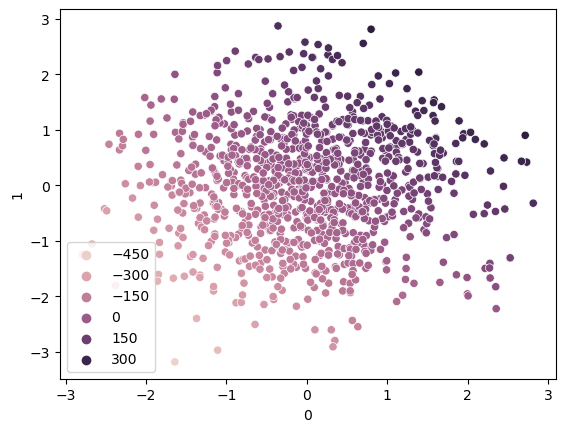

In [7]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
Xtr,Xte,ytr,yte=train_test_split(X,y,test_size=0.25,random_state=10)

In [10]:
from sklearn.svm import SVR

In [11]:
svr=SVR(kernel='linear')

In [12]:
svr.fit(Xtr,ytr)

SVR(kernel='linear')

In [13]:
y_pred=svr.predict(Xte)

In [15]:
from sklearn.metrics import r2_score as r2

In [16]:
r2(y_pred,yte)

0.9994456471770045

# Hyperparameter tuning

In [21]:
from sklearn.model_selection import GridSearchCV 

In [28]:
params={
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['linear'],
    'epsilon':[0.1,0.2,0.3]
}

In [29]:
grid=GridSearchCV(estimator=svr,param_grid=params,cv=5,verbose=1)

In [30]:
grid.fit(Xtr,ytr)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=1)

In [31]:
grid.best_params_

{'C': 100, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [32]:
y_pred=grid.predict(Xte)

In [33]:
r2(y_pred,yte)

0.9994681689647754